In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [13]:
Xtr = pd.read_csv('Xtr_Final.csv')
Xte = pd.read_csv('Xte_Final.csv')
Ytr = pd.read_csv('Ytr.csv')

In [14]:
X_train, X_valid, Y_train, Y_valid = train_test_split(Xtr, Ytr["Sale_Amount"], test_size=0.2, random_state=123)
model = XGBRegressor(learning_rate=0.1, colsample_bytree=0.8)

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
Y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("Training RMSE:", rmse_train)

Y_valid_pred = model.predict(X_valid)
rmse_valid = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("Validation RMSE:", rmse_valid)

Training RMSE: 339705.14771984075
Validation RMSE: 369798.7691981615


In [5]:
Yte_pred = model.predict(Xte)

In [6]:
pred_final = pd.read_csv('pred0.csv')
pred_final["Sale_Amount"] = Yte_pred

In [7]:
pred_final.to_csv('pred_final.csv', index=False)

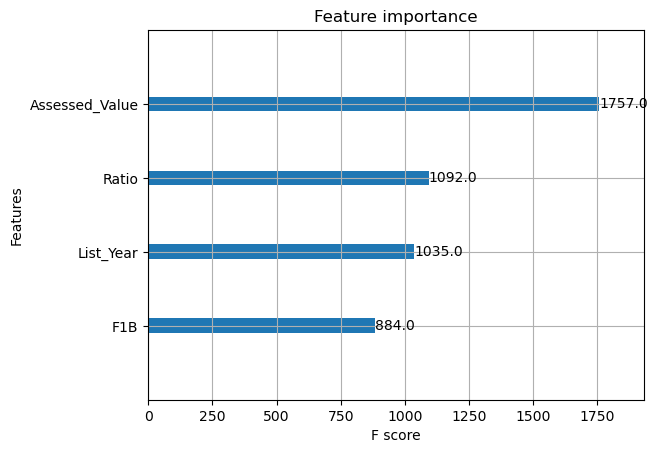

In [8]:
xgb.plot_importance(model, importance_type='weight')
plt.show()